In [1]:
#loading dataset
import pandas as pd

In [29]:
#loading plotting library
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [3]:
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na


In [50]:
# to clean the data - removing rows with non-numeric or missing values in mean score
df = df[pd.to_numeric(df['Mean Score'], errors='coerce').notnull()]

In [51]:
# changing mean score to numeric
df['Mean Score'] = pd.to_numeric(df['Mean Score'])

In [9]:
#to determine how many rows are remaining after removal
print("Dataset cleaned. Remaining rows:", len(df))

Dataset cleaned. Remaining rows: 137109


In [10]:
#viewing on the school name and mean score
print(df[['School Name', 'Mean Score']].head())

                      School Name  Mean Score
1  P.S. 034 Franklin D. Roosevelt        77.9
2  P.S. 034 Franklin D. Roosevelt        74.0
5          P.S. 140 Nathan Straus        67.4
6          P.S. 140 Nathan Straus        72.6
7          P.S. 140 Nathan Straus        64.4


In [11]:
print(df)

       School DBN                     School Name School Level  \
1          01M034  P.S. 034 Franklin D. Roosevelt          K-8   
2          01M034  P.S. 034 Franklin D. Roosevelt          K-8   
5          01M140          P.S. 140 Nathan Straus          K-8   
6          01M140          P.S. 140 Nathan Straus          K-8   
7          01M140          P.S. 140 Nathan Straus          K-8   
...           ...                             ...          ...   
212321     84X717            Icahn Charter School          K-8   
212322     84X717            Icahn Charter School          K-8   
212323     84X717            Icahn Charter School          K-8   
212324     84X717            Icahn Charter School          K-8   
212325     84X717            Icahn Charter School          K-8   

               Regents Exam  Year  Total Tested  Mean Score  \
1        Living Environment  2015            16        77.9   
2        Living Environment  2016             9        74.0   
5        Living En

In [18]:
#viewing only selected school (P.S. 034 Franklin D. Roosevelt) data
selected_school = "P.S. 034 Franklin D. Roosevelt"
school_data = df[df['School Name'] == selected_school]

In [19]:
print(school_data[['School Name', 'Mean Score']])

                           School Name  Mean Score
1       P.S. 034 Franklin D. Roosevelt        77.9
2       P.S. 034 Franklin D. Roosevelt        74.0
19480   P.S. 034 Franklin D. Roosevelt        77.9
19481   P.S. 034 Franklin D. Roosevelt        74.0
54237   P.S. 034 Franklin D. Roosevelt        78.8
102881  P.S. 034 Franklin D. Roosevelt        78.0
102882  P.S. 034 Franklin D. Roosevelt        77.9
139886  P.S. 034 Franklin D. Roosevelt        80.0
139888  P.S. 034 Franklin D. Roosevelt        75.5
139892  P.S. 034 Franklin D. Roosevelt        73.5


In [21]:
print(school_data['Mean Score'].describe())

count    10.000000
mean     76.750000
std       2.298429
min      73.500000
25%      74.375000
50%      77.900000
75%      77.975000
max      80.000000
Name: Mean Score, dtype: float64


In [23]:
#showing stats for all schools in dataset together
print("Statistics for all schools:")
print(df['Mean Score'].describe())

Statistics for all schools:
count    137109.000000
mean         65.998967
std          11.288883
min          15.000000
25%          58.300000
50%          65.400000
75%          73.400000
max          98.700000
Name: Mean Score, dtype: float64


In [24]:
#adding a score category column that labels the test scores in groups by low, med, or high
bins = [0, 50, 70, 100]
labels = ['Low', 'Medium', 'High']
df['Score Category'] = pd.cut(df['Mean Score'], bins=bins, labels=labels, right=False)

In [25]:
#display data with new column
print(df[['School Name', 'Mean Score', 'Score Category']].head())

                      School Name  Mean Score Score Category
1  P.S. 034 Franklin D. Roosevelt        77.9           High
2  P.S. 034 Franklin D. Roosevelt        74.0           High
5          P.S. 140 Nathan Straus        67.4         Medium
6          P.S. 140 Nathan Straus        72.6           High
7          P.S. 140 Nathan Straus        64.4         Medium


In [34]:
#selecting the mean score for the selected school, P.S. 034 Franklin D. Roosevelt, and the mean score of all schools
ps_034_mean = df[df['School Name'] == selected_school]['Mean Score'].mean()
all_schools_mean = df['Mean Score'].mean()

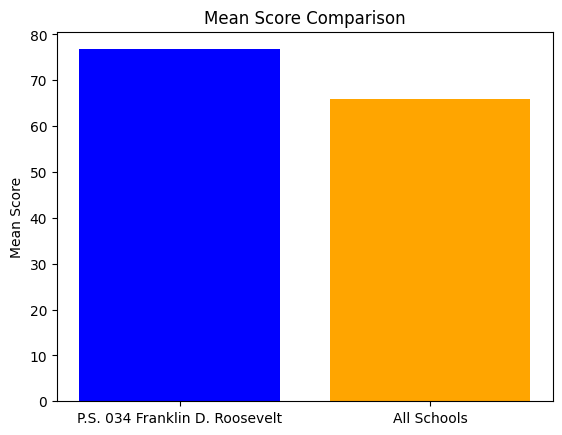

In [36]:
#to creae bar graph comparing mean score of selected school and all schools in dataset
labels = ['P.S. 034 Franklin D. Roosevelt', 'All Schools']
mean = [ps_034_mean, all_schools_mean]
plt.bar(labels, mean, color=['blue', 'orange'])
plt.title("Mean Score Comparison")
plt.ylabel("Mean Score")
plt.show()

In [47]:
#conclusion
conclusion = """
The mean score of P.S. 034 Franklin D. Roosevelt is higher than the mean score of all schools in the dataset.
This indicates that P.S. 034 Franklin D. Roosevelt performs better than the average school in terms of the Regents scores.
However, the difference between the scores is not significantly large, suggesting that while it performs better,
the overall variation in scores across schools is not drastic. This could indicate that many schools are performing at similar levels.
"""